In [1]:
# Import basic packages
import numpy as np
import scipy as sp
import pandas as pd
from astropy.io import fits
import fitsio as ft

# ==== Scikit-learn =======================
# Preprocessing
from sklearn.preprocessing import StandardScaler #Standar scaler for standardization
from sklearn.preprocessing import RobustScaler #Robust scaler for high dispersion
from sklearn.model_selection import train_test_split # For random split

# Classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

#Plotting
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# ==========================================
# Matplotlib, urlib etc 
import urllib
import urllib.request
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
from PIL import Image
%matplotlib inline

In [92]:
from sklearn.metrics import confusion_matrix

def rates(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    
    # Initialize
    X_mat = np.zeros(4)
    
    # Populate
    X_mat[0] = TN
    X_mat[1] = FN
    X_mat[2] = TP
    X_mat[3] = FP
    
    return X_mat  

### Import feature matrix and labels

In [2]:
X_feat_real_1 = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/X_feat_redux.npy')
y_lab_real = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/y_lab_redux.npy')

# Cuts using these top 5 features
- MAG_AUTO_G: 0.20025983224794616 (4)
- MU_MEAN_G: 0.1368483467374319   (16)
- MU_EFF_G: 0.093205793064768     (13)
- MAG_AUTO_R: 0.0906923999986175  (5)
- MAG_AUTO_I: 0.08749269948363461 (6)

### MAG_AUTO_G (4)

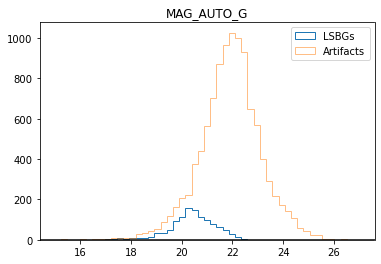

In [37]:
#Look at features to make cut
X_feat_vis = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/X_feat_redux.npy')
y_lab_vis = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/y_lab_redux.npy')
X_evals = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')['MAG_AUTO_G']
sel_e = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')['MU_MEAN_MODEL_G'] <=27
sel_v = X_feat_vis[:,16] <=27
bins = np.linspace(15,27)
dens,bins,bars = plt.hist(X_feat_vis[:,4][sel_v][y_lab_vis[sel_v]==1],
                            bins=bins,histtype='step',
                            label='LSBGs')
dens_e, bins_e,bars_e = plt.hist(X_feat_vis[:,4][sel_v][y_lab_vis[sel_v]==0],
                                   bins=bins,alpha=0.5,
                                   histtype='step',
                                   label='Artifacts')

plt.axhline(0,color='black')

plt.title('MAG_AUTO_G')
plt.legend()
plt.show()

In [117]:
mag_g_cut = 22

### MU_MEAN_G (16)

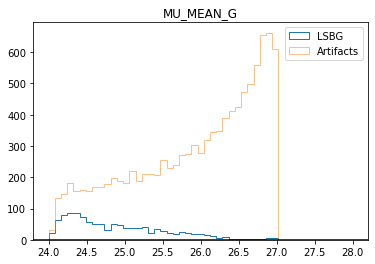

In [118]:
#Look at features to make cut

X_feat_vis = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/X_feat_redux.npy')
y_lab_vis = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/y_lab_redux.npy')
X_evals = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')['MU_MEAN_MODEL_G']
sel_e = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')['MU_MEAN_MODEL_G'] <=27
sel_v = X_feat_vis[:,16] <=27
bins = np.linspace(24,28)
counts,bins,bars = plt.hist(X_feat_vis[:,16][sel_v][y_lab_vis[sel_v]==1],
                            bins=bins,histtype='step',
                            label='LSBG')
counts_e, bins_e,bars_e = plt.hist(X_feat_vis[:,16][sel_v][y_lab_vis[sel_v]==0],
                                   bins=bins,alpha=0.5,
                                   histtype='step',
                                   label='Artifacts')
plt.axhline(0,color='black')

plt.title('MU_MEAN_G')
plt.legend()
plt.show()

In [119]:
mu_mean_g_cut = 25.75

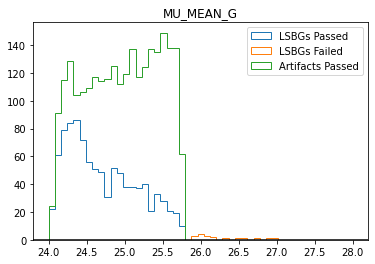

In [120]:
#Look at features to make cut

X_feat_vis = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/X_feat_redux.npy')
y_lab_vis = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/y_lab_redux.npy')
X_evals = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')

sel_e = (ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')['MU_MEAN_MODEL_G'] <=27)
sel_v = (X_feat_vis[:,16] <=27)

sel_v_p = (X_feat_vis[:,4][sel_v]<=mag_g_cut) & (X_feat_vis[:,16][sel_v]<=mu_mean_g_cut) & (y_lab_vis[sel_v]==1)
sel_v_f = (X_feat_vis[:,4][sel_v]>mag_g_cut) & (X_feat_vis[:,16][sel_v]>mu_mean_g_cut) &(y_lab_vis[sel_v]==1)
sel_v_a = (X_feat_vis[:,4][sel_v]<=mag_g_cut) & (X_feat_vis[:,16][sel_v]<=mu_mean_g_cut) &(y_lab_vis[sel_v]==0)

sel_e_p = (X_evals['MAG_AUTO_G'][sel_e]<=22) & (X_evals['MU_MEAN_MODEL_G'][sel_e]<=26.2)
bins = np.linspace(24,28)
counts_tp,bins_p,bars_p = plt.hist(X_feat_vis[:,16][sel_v][sel_v_p],
                            bins=bins,histtype='step',
                            label='LSBGs Passed')
counts_fn,bins_f,bars_f = plt.hist(X_feat_vis[:,16][sel_v][sel_v_f],
                            bins=bins,histtype='step',
                            label='LSBGs Failed')
counts_fp,bins_f,bars_f = plt.hist(X_feat_vis[:,16][sel_v][sel_v_a],
                            bins=bins,histtype='step',
                            label='Artifacts Passed')
plt.axhline(0,color='black')

plt.title('MU_MEAN_G')
plt.legend()
plt.show()

In [121]:
print('False Discovery Rate:',sum(counts_fp)/(sum(counts_tp)+sum(counts_fp)))
print('PP for Eval Sample:',len(X_evals[sel_e][sel_e_p]))

False Discovery Rate: 0.7206639954207212
PP for Eval Sample: 227496


### MU_EFF_G (13)

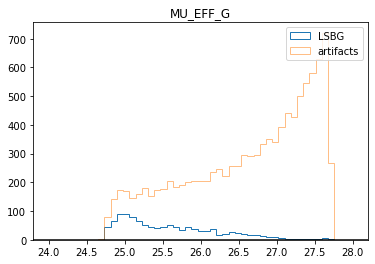

In [122]:
#Look at features to make cut

X_feat_vis = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/X_feat_redux.npy')
y_lab_vis = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/y_lab_redux.npy')
X_evals = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')['MU_EFF_MODEL_G']

sel_e = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')['MU_MEAN_MODEL_G'] <=27
sel_v = X_feat_vis[:,16] <=27
bins = np.linspace(24,28)
counts,bins,bars = plt.hist(X_feat_vis[:,13][sel_v][y_lab_vis[sel_v] == 1],
                            bins=bins,histtype='step',
                            label='LSBG')
counts_e, bins_e,bars_e = plt.hist(X_feat_vis[:,13][sel_v][y_lab_vis[sel_v] == 0],
                                   bins=bins,alpha=0.5,
                                   histtype='step',
                                   label='artifacts')
plt.axhline(0,color='black')

plt.title('MU_EFF_G')
plt.legend()
plt.show()

In [124]:
mu_eff_g_cut = 26.5

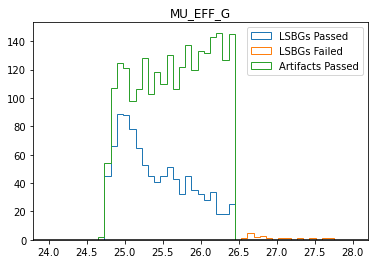

In [129]:
X_feat_vis = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/X_feat_redux.npy')
y_lab_vis = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/y_lab_redux.npy')
X_evals = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')


sel_e = (ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')['MU_MEAN_MODEL_G'] <=27)
sel_v = (X_feat_vis[:,16] <=27)

sel_v_p = ((X_feat_vis[:,4][sel_v]<=mag_g_cut) & 
           (X_feat_vis[:,16][sel_v]<=mu_mean_g_cut) &
           (X_feat_vis[:,13][sel_v]<=mu_eff_g_cut)&
           (y_lab_vis[sel_v]==1))

sel_v_f = ((X_feat_vis[:,4][sel_v]>mag_g_cut) & 
           (X_feat_vis[:,16][sel_v]>mu_mean_g_cut) &
           (X_feat_vis[:,13][sel_v]>mu_eff_g_cut)&
           (y_lab_vis[sel_v]==1))

sel_v_a = ((X_feat_vis[:,4][sel_v]<=mag_g_cut) & 
           (X_feat_vis[:,16][sel_v]<=mu_mean_g_cut) &
           (X_feat_vis[:,13][sel_v]<=mu_eff_g_cut)&
           (y_lab_vis[sel_v]==0))

sel_e_p = ((X_evals['MAG_AUTO_G'][sel_e]<=mag_g_cut) & 
           (X_evals['MU_MEAN_MODEL_G'][sel_e]<=mu_mean_g_cut) &
           (X_evals['MU_EFF_MODEL_G'][sel_e]<=mu_eff_g_cut))
bins = np.linspace(24,28)
counts_tp,bins_p,bars_p = plt.hist(X_feat_vis[:,13][sel_v][sel_v_p],
                            bins=bins,histtype='step',
                            label='LSBGs Passed')
counts_fn,bins_f,bars_f = plt.hist(X_feat_vis[:,13][sel_v][sel_v_f],
                            bins=bins,histtype='step',
                            label='LSBGs Failed')
counts_fp,bins_f,bars_f = plt.hist(X_feat_vis[:,13][sel_v][sel_v_a],
                            bins=bins,histtype='step',
                            label='Artifacts Passed')
plt.axhline(0,color='black')

plt.title('MU_EFF_G')
plt.legend()
plt.show()

In [130]:
print('False Discovery Rate:',sum(counts_fp)/(sum(counts_tp)+sum(counts_fp)))
print('PP for Eval Sample:',len(X_evals[sel_e][sel_e_p]))

False Discovery Rate: 0.7202636858698768
PP for Eval Sample: 177267


### MAG_AUTO_R (5)

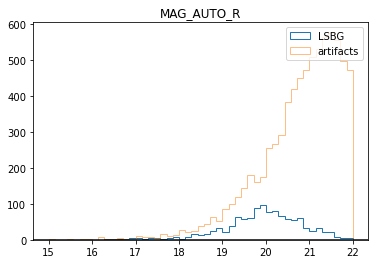

In [131]:
#Look at features to make cut

X_feat_vis = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/X_feat_redux.npy')
y_lab_vis = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/y_lab_redux.npy')
X_evals = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')['MAG_AUTO_R']

sel_e = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')['MU_MEAN_MODEL_G'] <=27
sel_v = X_feat_vis[:,16] <=27
bins = np.linspace(15,22)
counts,bins,bars = plt.hist(X_feat_vis[:,5][sel_v][y_lab_vis[sel_v] == 1],
                            bins=bins,histtype='step',
                            label='LSBG')
counts_e, bins_e,bars_e = plt.hist(X_feat_vis[:,5][sel_v][y_lab_vis[sel_v] == 0],
                                   bins=bins,alpha=0.5,
                                   histtype='step',
                                   label='artifacts')
plt.axhline(0,color='black')

plt.title('MAG_AUTO_R')
plt.legend()
plt.show()

In [ ]:
mag_r_cut = 20.5

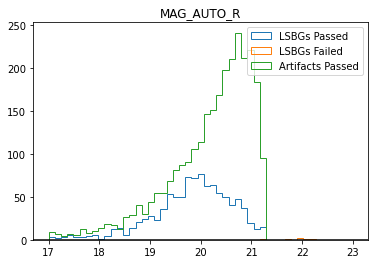

In [69]:
X_feat_vis = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/X_feat_redux.npy')
y_lab_vis = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/y_lab_redux.npy')
X_evals = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')


sel_e = (ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')['MU_MEAN_MODEL_G'] <=27)
sel_v = (X_feat_vis[:,16] <=27)

sel_v_p = ((X_feat_vis[:,4][sel_v]<=22) & 
           (X_feat_vis[:,16][sel_v]<=26.2) &
           (X_feat_vis[:,13][sel_v]<=26.75)&
           (X_feat_vis[:,5][sel_v]<=20.5)&
           (y_lab_vis[sel_v]==1))

sel_v_f = ((X_feat_vis[:,4][sel_v]>22) & 
           (X_feat_vis[:,16][sel_v]>26.2) &
           (X_feat_vis[:,13][sel_v]>26.75)&
           (X_feat_vis[:,5][sel_v]>20.5)&
           (y_lab_vis[sel_v]==1))

sel_v_a = ((X_feat_vis[:,4][sel_v]<=22) & 
           (X_feat_vis[:,16][sel_v]<=26.2) &
           (X_feat_vis[:,13][sel_v]<=26.75)&
           (X_feat_vis[:,5][sel_v]<=20.5)&
           (y_lab_vis[sel_v]==0))

sel_e_p = ((X_evals['MAG_AUTO_G'][sel_e]<=22) & 
           (X_evals['MU_MEAN_MODEL_G'][sel_e]<=26.2) &
           (X_evals['MU_EFF_MODEL_G'][sel_e]<=26.75) &
           (X_evals['MAG_AUTO_R'][sel_e]<=21.25))
bins = np.linspace(17,23)
counts_tp,bins_p,bars_p = plt.hist(X_feat_vis[:,5][sel_v][sel_v_p],
                            bins=bins,histtype='step',
                            label='LSBGs Passed')
counts_fn,bins_f,bars_f = plt.hist(X_feat_vis[:,5][sel_v][sel_v_f],
                            bins=bins,histtype='step',
                            label='LSBGs Failed')
counts_fp,bins_f,bars_f = plt.hist(X_feat_vis[:,5][sel_v][sel_v_a],
                            bins=bins,histtype='step',
                            label='Artifacts Passed')
plt.axhline(0,color='black')

plt.title('MAG_AUTO_R')
plt.legend()
plt.show()

In [70]:
print('False Discovery Rate:',sum(counts_fp)/(sum(counts_tp)+sum(counts_fp)))
print('PP for Eval Sample:',len(X_evals[sel_e][sel_e_p]))

False Discovery Rate: 0.7366746221161495
PP for Eval Sample: 190432


### MAG_AUTO_I (6)

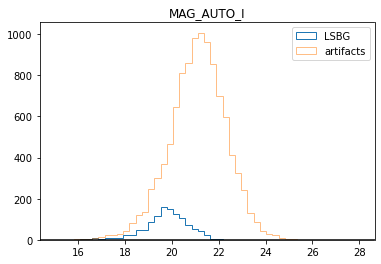

In [71]:
#Look at features to make cut

X_feat_vis = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/X_feat_redux.npy')
y_lab_vis = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/y_lab_redux.npy')
X_evals = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')['MAG_AUTO_I']

sel_e = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')['MU_MEAN_MODEL_G'] <=27
sel_v = X_feat_vis[:,16] <=27
bins = np.linspace(15,28)
counts,bins,bars = plt.hist(X_feat_vis[:,6][sel_v][y_lab_vis[sel_v] == 1],
                            bins=bins,histtype='step',
                            label='LSBG')
counts_e, bins_e,bars_e = plt.hist(X_feat_vis[:,6][sel_v][y_lab_vis[sel_v] == 0],
                                   bins=bins,alpha=0.5,
                                   histtype='step',
                                   label='artifacts')
plt.axhline(0,color='black')

plt.title('MAG_AUTO_I')
plt.legend()
plt.show()

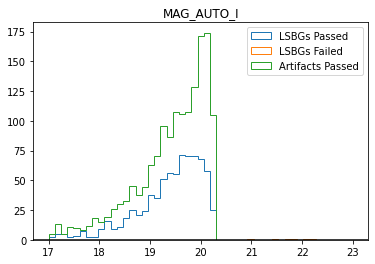

In [76]:
X_feat_vis = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/X_feat_redux.npy')
y_lab_vis = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/y_lab_redux.npy')
X_evals = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')


sel_e = (ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')['MU_MEAN_MODEL_G'] <=27)
sel_v = (X_feat_vis[:,16] <=27)

sel_v_p = ((X_feat_vis[:,4][sel_v]<=22) & 
           (X_feat_vis[:,16][sel_v]<=26.2) &
           (X_feat_vis[:,13][sel_v]<=26.75)&
           (X_feat_vis[:,5][sel_v]<=21.25)&
           (X_feat_vis[:,6][sel_v]<=20.25) &
           (y_lab_vis[sel_v]==1))

sel_v_f = ((X_feat_vis[:,4][sel_v]>22) & 
           (X_feat_vis[:,16][sel_v]>26.2) &
           (X_feat_vis[:,13][sel_v]>26.75)&
           (X_feat_vis[:,5][sel_v]>21.25)&
           (X_feat_vis[:,6][sel_v]>20.25) &
           (y_lab_vis[sel_v]==1))

sel_v_a = ((X_feat_vis[:,4][sel_v]<=22) & 
           (X_feat_vis[:,16][sel_v]<=26.2) &
           (X_feat_vis[:,13][sel_v]<=26.75)&
           (X_feat_vis[:,5][sel_v]<=21.25)&
           (X_feat_vis[:,6][sel_v]<=20.25) &
           (y_lab_vis[sel_v]==0))

sel_e_p = ((X_evals['MAG_AUTO_G'][sel_e]<=22) & 
           (X_evals['MU_MEAN_MODEL_G'][sel_e]<=26.2) &
           (X_evals['MU_EFF_MODEL_G'][sel_e]<=26.75) &
           (X_evals['MAG_AUTO_R'][sel_e]<=21.25)&
           (X_evals['MAG_AUTO_I'][sel_e]<=20.25))
bins = np.linspace(17,23)
counts_tp,bins_p,bars_p = plt.hist(X_feat_vis[:,6][sel_v][sel_v_p],
                            bins=bins,histtype='step',
                            label='LSBGs Passed')
counts_fn,bins_f,bars_f = plt.hist(X_feat_vis[:,6][sel_v][sel_v_f],
                            bins=bins,histtype='step',
                            label='LSBGs Failed')
counts_fp,bins_f,bars_f = plt.hist(X_feat_vis[:,6][sel_v][sel_v_a],
                            bins=bins,histtype='step',
                            label='Artifacts Passed')
plt.axhline(0,color='black')

plt.title('MAG_AUTO_I')
plt.legend()
plt.show()

In [77]:
print('False Discovery Rate:',sum(counts_fp)/(sum(counts_tp)+sum(counts_fp)))
print('PP for Eval Sample:',len(X_evals[sel_e][sel_e_p]))

False Discovery Rate: 0.6708640903169778
PP for Eval Sample: 107215


# Make Testing/Validation Matrix & Make Cuts

In [80]:
#Make the top 5 feature matrix
X_feat_real = np.column_stack((X_feat_real_1[:,4],X_feat_real_1[:,16],X_feat_real_1[:,13],X_feat_real_1[:,5],
                              X_feat_real_1[:,6]))
y_lab_real = np.load('/data/des81.a/data/kherron/LSBG/trainingfiles/redux/y_lab_redux.npy')

In [81]:
#Cut out the garbage
sel = (X_feat_real[:,1] < 27.0)
X_feat_real = X_feat_real[sel]
y_lab_real = y_lab_real[sel]

In [82]:
#Cut out sentinel values
sel = X_feat_real<80
sel = (sel[:,0]==True)&(sel[:,1]==True)&(sel[:,2]==True)
X_feat_real = X_feat_real[sel]
y_lab_real = y_lab_real[sel]

# Split between Testing and Validation

In [85]:
#Split up LSBGs and aritfacts into test and validation

index_real=(y_lab_real==1)
index_art=(y_lab_real==0)

X_art = X_feat_real[index_art]
X_lsbg = X_feat_real[index_real]

y_art = y_lab_real[index_art]
y_lsbg = y_lab_real[index_real]

X_train_art, X_test_art, y_train_art, y_test_art = train_test_split(X_art, y_art,
                                                                        train_size = 0.50, random_state = 10)
X_train_lsbg, X_test_lsbg, y_train_lsbg, y_test_lsbg = train_test_split(X_lsbg, y_lsbg,
                                                                        train_size = 0.50, random_state = 10)


print('===========Train==Test')
print("ARTIFACTS:",len(X_train_art), len(X_test_art))
print("LSBGs    :",len(X_train_lsbg), len(X_test_lsbg))

===========Train==Test
ARTIFACTS: 5283 5284
LSBGs    : 567 568


# Make Classifier

In [88]:
def simple_classifier(X_feat):
    y_pred = np.zeros(len(X_feat))
    sel = ((X_feat[:,0]<=22) & 
           (X_feat[:,1]<=26.2) &
           (X_feat[:,2]<=26.75)&
           (X_feat[:,3]<=21.25)&
           (X_feat[:,4]<=20.25))

    y_pred[sel] = 1
    
    
    return y_pred

# Testing Phase

In [89]:
X_test_1 = np.concatenate((X_train_lsbg,X_train_art)) 
y_test = np.concatenate((y_train_lsbg,y_train_art))

y_pred = simple_classifier(X_test_1)

In [90]:
len(y_pred)

5850

In [93]:
rate = rates(y_test,y_pred)
print("  TN      FN     TP     FP")
print(rate)

  TN      FN     TP     FP
[4484.  181.  386.  799.]


In [94]:
TN = rate[0]
FN = rate[1]
TP = rate[2]
FP = rate[3]

# Sensitivity, hit rate, recall, or true positive rate
TPR_test = TP/(TP+FN)
print("true positive rate:",TPR_test)
# Specificity or true negative rate
TNR_test = TN/(TN+FP) 
print("true negative rate:",TNR_test)
# Precision or positive predictive value
PPV_test = TP/(TP+FP)
print("positive predictive value:",PPV_test)
# Negative predictive value
NPV_test = TN/(TN+FN)
print("negative predictive value:",NPV_test)
# Fall out or false positive rate
FPR_test = FP/(FP+TN)
print("false positive rate:",FPR_test)
# False negative rate
FNR_test = FN/(TP+FN)
print("false negative rate:",FNR_test)
# False discovery rate
FDR_test = FP/(TP+FP)
print("false discovery rate:",FDR_test)

# Overall accuracy
ACC_test = (TP+TN)/(TP+FP+FN+TN)
print("Overall accuracy:",ACC_test)

true positive rate: 0.6807760141093474
true negative rate: 0.848760174143479
positive predictive value: 0.32573839662447257
negative predictive value: 0.9612004287245445
false positive rate: 0.1512398258565209
false negative rate: 0.31922398589065254
false discovery rate: 0.6742616033755274
Overall accuracy: 0.8324786324786325


# Validation Phase

In [95]:
#Predict on validation set
X_valid_1 = np.concatenate((X_test_lsbg,X_test_art)) 
y_valid = np.concatenate((y_test_lsbg,y_test_art))

y_pred = simple_classifier(X_valid_1)

In [96]:
#Generate predicted positive population
pp_bin1 = len(y_pred[y_pred == 1.])

In [97]:
#Check it out and hope for the best :)
P_bin1 = pp_bin1 * (PPV_test/TPR_test)


print('Estimated TPs and FNs:',P_bin1)
print('Actual TPs and FNs:', len(y_valid[y_valid == 1.]))
print('Total sample size:', len(y_pred))

Estimated TPs and FNs: 559.3443037974683
Actual TPs and FNs: 568
Total sample size: 5852


In [98]:
rate = rates(y_valid,y_pred)
print("  TN      FN     TP     FP")
print(rate)

  TN      FN     TP     FP
[4502.  181.  387.  782.]


In [99]:
TN = rate[0]
FN = rate[1]
TP = rate[2]
FP = rate[3]

# Sensitivity, hit rate, recall, or true positive rate
TPR_valid = TP/(TP+FN)
print("true positive rate:",TPR_valid)
# Specificity or true negative rate
TNR_valid = TN/(TN+FP) 
print("true negative rate:",TNR_valid)
# Precision or positive predictive value
PPV_valid = TP/(TP+FP)
print("positive predictive value:",PPV_valid)
# Negative predictive value
NPV_valid = TN/(TN+FN)
print("negative predictive value:",NPV_valid)
# Fall out or false positive rate
FPR_valid = FP/(FP+TN)
print("false positive rate:",FPR_valid)
# False negative rate
FNR_valid = FN/(TP+FN)
print("false negative rate:",FNR_valid)
# False discovery rate
FDR_valid= FP/(TP+FP)
print("false discovery rate:",FDR_valid)

# Overall accuracy
ACC_valid = (TP+TN)/(TP+FP+FN+TN)
print("Overall accuracy:",ACC_valid)


true positive rate: 0.6813380281690141
true negative rate: 0.852006056018168
positive predictive value: 0.33105218135158254
negative predictive value: 0.9613495622464232
false positive rate: 0.14799394398183194
false negative rate: 0.31866197183098594
false discovery rate: 0.6689478186484175
Overall accuracy: 0.8354408749145591


# Evaluation Phase

In [100]:
sel = (ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')['MU_MEAN_MODEL_G'] < 27.0)
eval_set = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')
#X_evaluation_feat = eval_set['MAG_AUTO_G'][sel]
X_evaluation_feat = np.column_stack((eval_set['MAG_AUTO_G'][sel],eval_set['MU_MEAN_MODEL_G'][sel],
                                     eval_set['MU_EFF_MODEL_G'][sel],eval_set['MAG_AUTO_R'][sel],
                                     eval_set['MAG_AUTO_I'][sel]))


In [101]:
y_eval_pred = simple_classifier(X_evaluation_feat)

In [102]:
pp_bin1 = len(y_eval_pred[y_eval_pred == 1.])

In [103]:
P_bin1 = pp_bin1 * (PPV_test/TPR_test)

In [107]:
print('Estimated TPs and FNs:',P_bin1)
print('PP:',pp_bin1)
print('Total sample size:', len(y_eval_pred))
print('Missed LSBGs:',FNR_test*P_bin1)

Estimated TPs and FNs: 51300.3417721519
PP: 107215
Total sample size: 609783
Missed LSBGs: 16376.299578059072


#   

# ============= WORK SPACE ==================

In [ ]:
from bayesian_efficiency import confidenceInterval

eff_FPR, confidence_FPR = confidenceInterval(n=FP+TN,k=FP)
bu_FPR = np.array((confidence_FPR[1]-confidence_FPR[0])/2)
print('Lower:',confidence_FPR[0])
print('Upper:',confidence_FPR[1])
print('Margin of error:',(confidence_FPR[1]-confidence_FPR[0])/2)
print()

eff_TPR, confidence_TPR = confidenceInterval(n=TP+FN,k=TP)
bu_TPR = np.array((confidence_TPR[1]-confidence_TPR[0])/2)
print('Lower:',confidence_TPR[0])
print('Upper:',confidence_TPR[1])
print('Margin of error:',(confidence_TPR[1]-confidence_TPR[0])/2)
print()

eff_PP, confidence_PP = confidenceInterval(n=TP+FP+TN+FN,k=TP+FP)
bu_pp = np.array((confidence_TPR[1]-confidence_TPR[0])/2)

print('Lower:',confidence_PP[0])
print('Upper:',confidence_PP[1])
print('Margin of error:',(confidence_PP[1]-confidence_PP[0])/2)
print()

err_num = np.sqrt(( (confidence_FPR[1]-eff_TPR) * len(y_pred) )**2 + (confidence_PP[1]-eff_PP)**2 ) 

err_denom = np.sqrt( (confidence_TPR[1]-eff_TPR)**2 + (confidence_TPR[1]-eff_TPR)**2)

num = (pp_bin1 - (FPR_test * len(y_eval_pred)))
denom = (TPR_test - FPR_test)

P_err = np.array(P_bin1 * np.sqrt( (err_num/num)**2 + (err_denom/denom)**2))
print(int(P_err))

In [ ]:
randomstates = np.random.randint(1,100,size=100)
for i in randomstates:
    #Split up LSBGs and aritfacts into test and validation

    index_real=(y_lab_real==1)
    index_art=(y_lab_real==0)

    X_art = X_feat_real[index_art]
    X_lsbg = X_feat_real[index_real]

    y_art = y_lab_real[index_art]
    y_lsbg = y_lab_real[index_real]

    X_train_art, X_test_art, y_train_art, y_test_art = train_test_split(X_art, y_art,
                                                                            train_size = 0.50, random_state = i)
    X_train_lsbg, X_test_lsbg, y_train_lsbg, y_test_lsbg = train_test_split(X_lsbg, y_lsbg,
                                                                            train_size = 0.50, random_state = i)

    X_test_1 = np.concatenate((X_train_lsbg,X_train_art)) 
    y_test = np.concatenate((np.ones(len(X_train_lsbg)),np.zeros(len(X_train_art))))

    y_pred = simple_classifier(X_test_1)

    rate = rates(y_test,y_pred)
    TN = rate[0]
    FN = rate[1]
    TP = rate[2]
    FP = rate[3]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR_bin1_1 = TP/(TP+FN)
    # Specificity or true negative rate
    TNR_bin1_1 = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV_bin1_1 = TP/(TP+FP)
    # Negative predictive value
    NPV_bin1_1 = TN/(TN+FN)
    # Fall out or false positive rate
    FPR_bin1_1 = FP/(FP+TN)
    # False negative rate
    FNR_bin1_1 = FN/(TP+FN)
    # False discovery rate
    FDR_bin1_1 = FP/(TP+FP)

    # Overall accuracy
    ACC_bin1_1 = (TP+TN)/(TP+FP+FN+TN)

    TNR_test = np.append(TNR_test,TNR_bin1_1)

    #Predict on validation set
    X_valid_1 = np.concatenate((X_test_lsbg,X_test_art)) 
    y_valid = np.concatenate((np.ones(len(X_test_lsbg)),np.zeros(len(X_test_art))))

    y_pred = simple_classifier(X_valid_1)

    #Generate predicted positive population
    pp_bin1 = len(y_pred[y_pred == 1.])

    #Check it out and hope for the best :)
    P_bin1 = (pp_bin1 - (FPR_bin1_1 * len(y_pred))) / (TPR_bin1_1 - FPR_bin1_1)
    
    rate = rates(y_valid,y_pred)

    TN = rate[0]
    FN = rate[1]
    TP = rate[2]
    FP = rate[3]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR_bin1_1 = TP/(TP+FN)
    # Specificity or true negative rate
    TNR_bin1_1 = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV_bin1_1 = TP/(TP+FP)
    # Negative predictive value
    NPV_bin1_1 = TN/(TN+FN)
    # Fall out or false positive rate
    FPR_bin1_1 = FP/(FP+TN)
    # False negative rate
    FNR_bin1_1 = FN/(TP+FN)
    # False discovery rate
    FDR_bin1_1 = FP/(TP+FP)
    # Overall accuracy
    ACC_bin1_1 = (TP+TN)/(TP+FP+FN+TN)

    TNR_valid = np.append(TNR_valid,TNR_bin1_1)
    
    y_eval_pred = simple_classifier(X_evaluation_feat)
    pp_bin1 = len(y_eval_pred[y_eval_pred == 1.])
    P_bin1 = (pp_bin1 - (FPR_bin1_1 * len(y_eval_pred))) / (TPR_bin1_1 - FPR_bin1_1)
    
    
    
    
    
    
    from bayesian_efficiency import confidenceInterval

    eff_FPR, confidence_FPR = confidenceInterval(n=FP+TN,k=FP)
    bu_FPR = np.append(bu_FPR,(confidence_FPR[1]-confidence_FPR[0])/2)


    eff_TPR, confidence_TPR = confidenceInterval(n=TP+FN,k=TP)
    bu_TPR = np.append(bu_TPR,(confidence_TPR[1]-confidence_TPR[0])/2)

    eff_PP, confidence_PP = confidenceInterval(n=TP+FP+TN+FN,k=TP+FP)
    bu_pp = np.append(bu_pp,(confidence_PP[1]-confidence_PP[0])/2)



    err_num = np.sqrt(( (confidence_FPR[1]-eff_TPR) * len(y_pred) )**2 + (confidence_PP[1]-eff_PP)**2 ) 

    err_denom = np.sqrt( (confidence_TPR[1]-eff_TPR)**2 + (confidence_TPR[1]-eff_TPR)**2)

    num = (pp_bin1 - (FPR_bin1_1 * len(y_eval_pred)))
    denom = (TPR_bin1_1 - FPR_bin1_1)

    P_err = np.append(P_err,P_bin1 * np.sqrt( (err_num/num)**2 + (err_denom/denom)**2))





In [ ]:
print('=======Underlying Population Error======')
print('Average:',np.average(P_err))
print('Standard Deviation:',np.std(P_err))
print()
print('=========FPR Uncertainty================')
print('Average:',np.average(bu_FPR))
print('Standard Deviation:',np.std(bu_FPR))
print()
print('===========TPR Uncertainty==============')
print('Average:',np.average(bu_TPR))
print('Standard Deviation:',np.std(bu_TPR))

In [ ]:
print('===========Test============')
print('Average:',np.average(TNR_test))
print('Standard Deviation:',np.std(TNR_test))
print()
print('=========Validation========')
print('Average:',np.average(TNR_valid))
print('Standard Deviation:',np.std(TNR_valid))
print()
print('========Combined===========')
print('Average:',np.average(np.concatenate((TNR_test,TNR_valid))))
print('Standard Deviation:',np.std(np.concatenate((TNR_test,TNR_valid))))

## random state = 1

In [ ]:
#Split up LSBGs and aritfacts into test and validation

index_real=(y_lab_real==1)
index_art=(y_lab_real==0)

X_art = X_feat_real[index_art]
X_lsbg = X_feat_real[index_real]

y_art = y_lab_real[index_art]
y_lsbg = y_lab_real[index_real]

X_train_art, X_test_art, y_train_art, y_test_art = train_test_split(X_art, y_art,
                                                                        train_size = 0.50, random_state = 1)
X_train_lsbg, X_test_lsbg, y_train_lsbg, y_test_lsbg = train_test_split(X_lsbg, y_lsbg,
                                                                        train_size = 0.50, random_state = 1)


print('===========Train==Test')
print("ARTIFACTS:",len(X_train_art), len(X_test_art))
print("LSBGs    :",len(X_train_lsbg), len(X_test_lsbg))

print()
print()
print()
print()

X_test_1 = np.concatenate((X_train_lsbg,X_train_art)) 
y_test = np.concatenate((np.ones(len(X_train_lsbg)),np.zeros(len(X_train_art))))

y_pred = simple_classifier(X_test_1)

rate = rates(y_test,y_pred)
print("  TN      FN     TP     FP")
print(rate)
print()
print()
TN = rate[0]
FN = rate[1]
TP = rate[2]
FP = rate[3]

# Sensitivity, hit rate, recall, or true positive rate
TPR_bin1_1 = TP/(TP+FN)
print("true positive rate:",TPR_bin1_1)
# Specificity or true negative rate
TNR_bin1_1 = TN/(TN+FP) 
print("true negative rate:",TNR_bin1_1)
# Precision or positive predictive value
PPV_bin1_1 = TP/(TP+FP)
print("positive predictive value:",PPV_bin1_1)
# Negative predictive value
NPV_bin1_1 = TN/(TN+FN)
print("negative predictive value:",NPV_bin1_1)
# Fall out or false positive rate
FPR_bin1_1 = FP/(FP+TN)
print("false positive rate:",FPR_bin1_1)
# False negative rate
FNR_bin1_1 = FN/(TP+FN)
print("false negative rate:",FNR_bin1_1)
# False discovery rate
FDR_bin1_1 = FP/(TP+FP)
print("false discovery rate:",FDR_bin1_1)

# Overall accuracy
ACC_bin1_1 = (TP+TN)/(TP+FP+FN+TN)
print("Overall accuracy:",ACC_bin1_1)

TPR_test = np.append(TPR_test,TPR_bin1_1)

#Predict on validation set
X_valid_1 = np.concatenate((X_test_lsbg,X_test_art)) 
y_valid = np.concatenate((np.ones(len(X_test_lsbg)),np.zeros(len(X_test_art))))

y_pred = simple_classifier(X_valid_1)

#Generate predicted positive population
pp_bin1 = len(y_pred[y_pred == 1.])

#Check it out and hope for the best :)
P_bin1 = (pp_bin1 - (FPR_bin1_1 * len(y_pred))) / (TPR_bin1_1 - FPR_bin1_1)

print('===========================VALIDATION===============================')

print('Predicted positives:',P_bin1)
print('Actual positives:', len(y_valid[y_valid == 1.]))
print('Total sample size:', len(y_pred))
print()
print()
print()

rate = rates(y_valid,y_pred)
print("  TN      FN     TP     FP")
print(rate)
print()
print()
TN = rate[0]
FN = rate[1]
TP = rate[2]
FP = rate[3]

# Sensitivity, hit rate, recall, or true positive rate
TPR_bin1_1 = TP/(TP+FN)
print("true positive rate:",TPR_bin1_1)
# Specificity or true negative rate
TNR_bin1_1 = TN/(TN+FP) 
print("true negative rate:",TNR_bin1_1)
# Precision or positive predictive value
PPV_bin1_1 = TP/(TP+FP)
print("positive predictive value:",PPV_bin1_1)
# Negative predictive value
NPV_bin1_1 = TN/(TN+FN)
print("negative predictive value:",NPV_bin1_1)
# Fall out or false positive rate
FPR_bin1_1 = FP/(FP+TN)
print("false positive rate:",FPR_bin1_1)
# False negative rate
FNR_bin1_1 = FN/(TP+FN)
print("false negative rate:",FNR_bin1_1)
# False discovery rate
FDR_bin1_1 = FP/(TP+FP)
print("false discovery rate:",FDR_bin1_1)

# Overall accuracy
ACC_bin1_1 = (TP+TN)/(TP+FP+FN+TN)
print("Overall accuracy:",ACC_bin1_1)

TPR_valid = np.append(TPR_valid,TPR_bin1_1)



## Random State = 5

In [ ]:
#Split up LSBGs and aritfacts into test and validation

index_real=(y_lab_real==1)
index_art=(y_lab_real==0)

X_art = X_feat_real[index_art]
X_lsbg = X_feat_real[index_real]

y_art = y_lab_real[index_art]
y_lsbg = y_lab_real[index_real]

X_train_art, X_test_art, y_train_art, y_test_art = train_test_split(X_art, y_art,
                                                                        train_size = 0.50, random_state = 5)
X_train_lsbg, X_test_lsbg, y_train_lsbg, y_test_lsbg = train_test_split(X_lsbg, y_lsbg,
                                                                        train_size = 0.50, random_state = 5)


print('===========Train==Test')
print("ARTIFACTS:",len(X_train_art), len(X_test_art))
print("LSBGs    :",len(X_train_lsbg), len(X_test_lsbg))

print()
print()
print()
print()

X_test_1 = np.concatenate((X_train_lsbg,X_train_art)) 
y_test = np.concatenate((np.ones(len(X_train_lsbg)),np.zeros(len(X_train_art))))

y_pred = simple_classifier(X_test_1)

rate = rates(y_test,y_pred)
print("  TN      FN     TP     FP")
print(rate)
print()
print()
TN = rate[0]
FN = rate[1]
TP = rate[2]
FP = rate[3]

# Sensitivity, hit rate, recall, or true positive rate
TPR_bin1_1 = TP/(TP+FN)
print("true positive rate:",TPR_bin1_1)
# Specificity or true negative rate
TNR_bin1_1 = TN/(TN+FP) 
print("true negative rate:",TNR_bin1_1)
# Precision or positive predictive value
PPV_bin1_1 = TP/(TP+FP)
print("positive predictive value:",PPV_bin1_1)
# Negative predictive value
NPV_bin1_1 = TN/(TN+FN)
print("negative predictive value:",NPV_bin1_1)
# Fall out or false positive rate
FPR_bin1_1 = FP/(FP+TN)
print("false positive rate:",FPR_bin1_1)
# False negative rate
FNR_bin1_1 = FN/(TP+FN)
print("false negative rate:",FNR_bin1_1)
# False discovery rate
FDR_bin1_1 = FP/(TP+FP)
print("false discovery rate:",FDR_bin1_1)

# Overall accuracy
ACC_bin1_1 = (TP+TN)/(TP+FP+FN+TN)
print("Overall accuracy:",ACC_bin1_1)

TPR_test = np.append(TPR_test,TPR_bin1_1)

#Predict on validation set
X_valid_1 = np.concatenate((X_test_lsbg,X_test_art)) 
y_valid = np.concatenate((np.ones(len(X_test_lsbg)),np.zeros(len(X_test_art))))

y_pred = simple_classifier(X_valid_1)

#Generate predicted positive population
pp_bin1 = len(y_pred[y_pred == 1.])

#Check it out and hope for the best :)
P_bin1 = (pp_bin1 - (FPR_bin1_1 * len(y_pred))) / (TPR_bin1_1 - FPR_bin1_1)

print('===========================VALIDATION===============================')

print('Predicted positives:',P_bin1)
print('Actual positives:', len(y_valid[y_valid == 1.]))
print('Total sample size:', len(y_pred))
print()
print()
print()

rate = rates(y_valid,y_pred)
print("  TN      FN     TP     FP")
print(rate)
print()
print()
TN = rate[0]
FN = rate[1]
TP = rate[2]
FP = rate[3]

# Sensitivity, hit rate, recall, or true positive rate
TPR_bin1_1 = TP/(TP+FN)
print("true positive rate:",TPR_bin1_1)
# Specificity or true negative rate
TNR_bin1_1 = TN/(TN+FP) 
print("true negative rate:",TNR_bin1_1)
# Precision or positive predictive value
PPV_bin1_1 = TP/(TP+FP)
print("positive predictive value:",PPV_bin1_1)
# Negative predictive value
NPV_bin1_1 = TN/(TN+FN)
print("negative predictive value:",NPV_bin1_1)
# Fall out or false positive rate
FPR_bin1_1 = FP/(FP+TN)
print("false positive rate:",FPR_bin1_1)
# False negative rate
FNR_bin1_1 = FN/(TP+FN)
print("false negative rate:",FNR_bin1_1)
# False discovery rate
FDR_bin1_1 = FP/(TP+FP)
print("false discovery rate:",FDR_bin1_1)

# Overall accuracy
ACC_bin1_1 = (TP+TN)/(TP+FP+FN+TN)
print("Overall accuracy:",ACC_bin1_1)

TPR_valid = np.append(TPR_valid,TPR_bin1_1)

